## Cross-validation visualization

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

from sklearn.model_selection import (
    GroupKFold,
    GroupShuffleSplit,
    KFold,
    ShuffleSplit,
    StratifiedGroupKFold,
    StratifiedKFold,
    StratifiedShuffleSplit,
    TimeSeriesSplit,
)

In [6]:
rng = np.random.RandomState(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 10

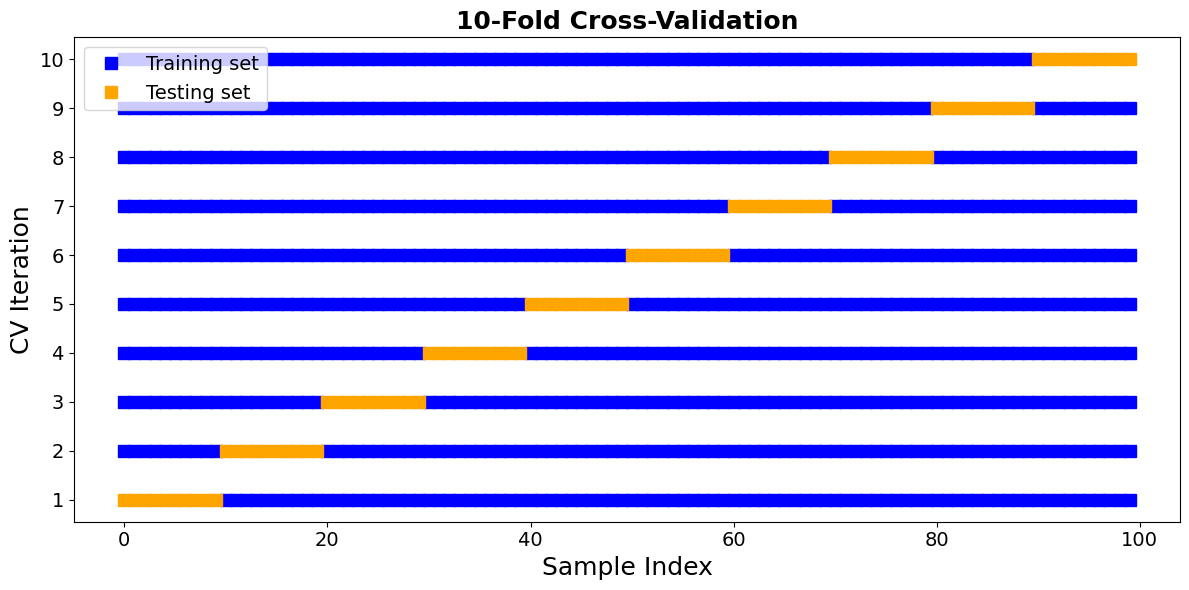

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Create sample data
n_samples = 100  # Number of samples
kf = KFold(n_splits=10)  # 10-Fold Cross-Validation

# Generate a simple index for the dataset
indices = np.arange(n_samples)

# Plot the K-Fold splits
def plot_kfold(kf, n_samples, title="10-Fold Cross-Validation"):
    fig, ax = plt.subplots(figsize=(12, 6))  # Larger figure size for better readability
    
    for i, (train_idx, test_idx) in enumerate(kf.split(indices)):
        # Plot training indices
        ax.plot(
            train_idx,
            [i + 1] * len(train_idx),  # Shift rows by 1 to start from 1
            's',  # Square markers
            color='blue',
            label="Training set" if i == 0 else None,
            markersize=8
        )
        # Plot testing indices
        ax.plot(
            test_idx,
            [i + 1] * len(test_idx),  # Shift rows by 1 to start from 1
            's',  # Square markers
            color='orange',
            label="Testing set" if i == 0 else None,
            markersize=8
        )
    
    # Formatting the plot
    ax.set(
        yticks=np.arange(1, 11),  # Set y-axis ticks from 1 to 10
        ylabel="CV Iteration",
        xlabel="Sample Index",
        title=title
    )
    ax.set_title(title, fontsize=18, weight='bold')        # Title size
    ax.set_xlabel("Sample Index", fontsize=18)            # X-axis label size
    ax.set_ylabel("CV Iteration", fontsize=18)            # Y-axis label size
    ax.tick_params(axis='both', labelsize=14)             # Tick label size for both axes
    ax.legend(loc='upper left', fontsize=14)             # Legend text size
    ax.grid(False)                                        # Disable grid lines for cleaner plot
    plt.tight_layout()
    plt.savefig("C:/Users/gard_/Documents/MasterThesis/ProjectThesis/MyPipeline/Figures/10Fold_CV.pdf", dpi=300, bbox_inches="tight") 
    plt.show()

# Visualize the 10-fold cross-validation
plot_kfold(kf, n_samples)

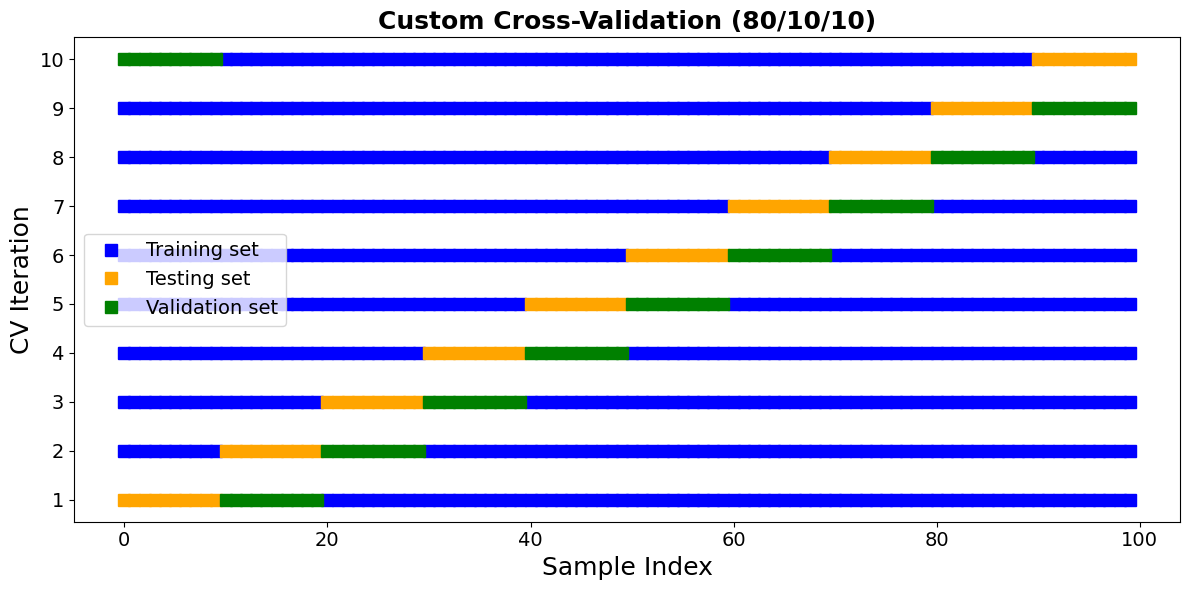

In [22]:
# Create sample data
n_samples = 100  # Number of samples
n_splits = 10  # Number of folds
kf = KFold(n_splits=n_splits)

# Generate a simple index for the dataset
indices = np.arange(n_samples)

# Calculate split sizes
test_size = int(n_samples * 0.10)  # 10% test set
val_size = int(n_samples * 0.10)   # 10% validation set
train_size = n_samples - test_size - val_size  # Remaining 80% for training

# Plot the Method 2 splits
def plot_nested_kfold(kf, n_samples, title="Custom Cross-Validation (80/10/10)"):
    fig, ax = plt.subplots(figsize=(12, 6))  # Larger figure size for better readability
    
    for i, (train_idx, test_idx) in enumerate(kf.split(indices)):
        # Determine the test set
        start_test = test_idx[0]
        end_test = test_idx[-1] + 1
        test_indices = np.arange(start_test, end_test)
        
        # Determine the validation set (shifted to the right of the test set)
        start_val = (end_test) % n_samples
        end_val = (start_val + val_size) % n_samples
        
        if end_val > start_val:  # Validation set is contiguous
            val_indices = np.arange(start_val, end_val)
        else:  # Validation set wraps around
            val_indices = np.hstack([np.arange(start_val, n_samples), np.arange(0, end_val)])
        
        # Determine the training set
        train_indices = np.setdiff1d(indices, np.hstack([test_indices, val_indices]))
        
        # Plot training indices
        ax.plot(
            train_indices,
            [i + 1] * len(train_indices),  # CV iteration starts at 1
            's',  # Square markers
            color='blue',
            label="Training set" if i == 0 else None,
            markersize=8
        )
        # Plot testing indices
        ax.plot(
            test_indices,
            [i + 1] * len(test_indices),  # CV iteration starts at 1
            's',  # Square markers
            color='orange',
            label="Testing set" if i == 0 else None,
            markersize=8
        )
        # Plot validation indices
        ax.plot(
            val_indices,
            [i + 1] * len(val_indices),  # CV iteration starts at 1
            's',  # Square markers
            color='green',
            label="Validation set" if i == 0 else None,
            markersize=8
        )
    
    # Formatting the plot
    ax.set(
        yticks=np.arange(1, n_splits + 1),  # Set y-axis ticks from 1 to number of folds
        ylabel="CV Iteration",
        xlabel="Sample Index",
        title=title
    )
    ax.set_title(title, fontsize=18, weight='bold')        # Title size
    ax.set_xlabel("Sample Index", fontsize=18)            # X-axis label size
    ax.set_ylabel("CV Iteration", fontsize=18)            # Y-axis label size
    ax.tick_params(axis='both', labelsize=14)             # Tick label size for both axes
    ax.legend(loc='center left', fontsize=14)             # Legend text size
    ax.grid(False)                                        # Disable grid lines for cleaner plot
    plt.tight_layout()
    plt.savefig("C:/Users/gard_/Documents/MasterThesis/ProjectThesis/MyPipeline/Figures/Nested10Fold_CV.pdf", dpi=300, bbox_inches="tight") 
    plt.show()

# Visualize the nested cross-validation
plot_nested_kfold(kf, n_samples)